In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Stock: AAPL
Beta: 1.1094097050010518
Intercept: 0.00611159080533766
Significance: significant


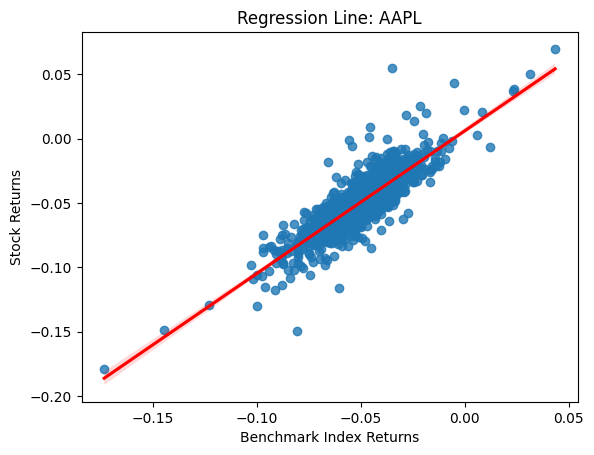

In [7]:
# Define the stock symbol and benchmark index symbol
stock_symbol = "AAPL"
index_symbol = "^IXIC"

# Define the risk-free rate
risk_free_rate = 0.05

# Retrieve historical price data for the stock and benchmark index
start_date = "2018-01-01"
end_date = "2023-01-01"

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)["Adj Close"]
index_data = yf.download(index_symbol, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns for the stock and benchmark index
stock_returns = stock_data.pct_change().dropna()
index_returns = index_data.pct_change().dropna()

# Combine stock returns and benchmark index returns into a single dataframe
data = pd.concat([stock_returns, index_returns], axis=1)
data.columns = ["Stock Returns", "Index Returns"]

# Subtract the risk-free rate from the returns
data -= risk_free_rate

# Perform linear regression
X = sm.add_constant(data["Index Returns"])
model = sm.OLS(data["Stock Returns"], X)
results = model.fit()

# Extract beta and intercept from regression results
beta = results.params["Index Returns"]
intercept = results.params["const"]

# Perform significance testing
p_value = results.pvalues["Index Returns"]
if p_value < 0.05:
    significance = "significant"
else:
    significance = "not significant"

# Print the results
print("Stock:", stock_symbol)
print("Beta:", beta)
print("Intercept:", intercept)
print("Significance:", significance)

# Plot the regression line
sns.regplot(x="Index Returns", y="Stock Returns", data=data, line_kws={"color": "red"})
plt.xlabel("Benchmark Index Returns")
plt.ylabel("Stock Returns")
plt.title("Regression Line: " + stock_symbol)
plt.show()


In [8]:
# Define the Nifty 50 stock symbols
nifty50_stocks = ["TCS", 
                  "HDFCBANK",
                  "INFY", 
                  "HDFC", 
                  "ICICIBANK", 
                  "KOTAKBANK", 
                  "ITC", 
                  "BHARTIARTL", 
                  "HINDUNILVR", 
                  "AXISBANK", 
                  "ASIANPAINT", 
                  "LT", 
                  "MARUTI", 
                  "NESTLEIND", 
                  "HINDUNILVR", 
                  "POWERGRID", 
                  "BAJFINANCE", 
                  "SBIN", 
                  "TITAN",
                  "TATAMOTORS"]

nifty50_stocks_mod=[x +".NS" for x in nifty50_stocks ]  # adding ".NS" into the end of ticker list 


In [9]:
nifty50_stocks_mod

['TCS.NS',
 'HDFCBANK.NS',
 'INFY.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'KOTAKBANK.NS',
 'ITC.NS',
 'BHARTIARTL.NS',
 'HINDUNILVR.NS',
 'AXISBANK.NS',
 'ASIANPAINT.NS',
 'LT.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'HINDUNILVR.NS',
 'POWERGRID.NS',
 'BAJFINANCE.NS',
 'SBIN.NS',
 'TITAN.NS',
 'TATAMOTORS.NS']

In [10]:
# Define the risk-free rate
risk_free_rate = 0.05

In [11]:
# Retrieve historical price data for each stock and the Nifty 50 index
start_date = "2018-01-01"
end_date = "2023-01-01"

In [12]:
stock_data = yf.download(nifty50_stocks_mod, start=start_date, end=end_date)["Adj Close"]
index_data = yf.download("^NSEI", start=start_date, end=end_date)["Adj Close"]

[*********************100%***********************]  19 of 19 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
# Calculate daily returns for each stock and the Nifty 50 index
stock_returns = stock_data.pct_change()
index_returns = index_data.pct_change()

# Combine stock returns and index returns into a single dataframe
combined_returns = pd.concat([stock_returns, index_returns], axis=1)

# Subtract the risk-free rate from the returns
combined_returns -= risk_free_rate
combined_returns.dropna(inplace=True)

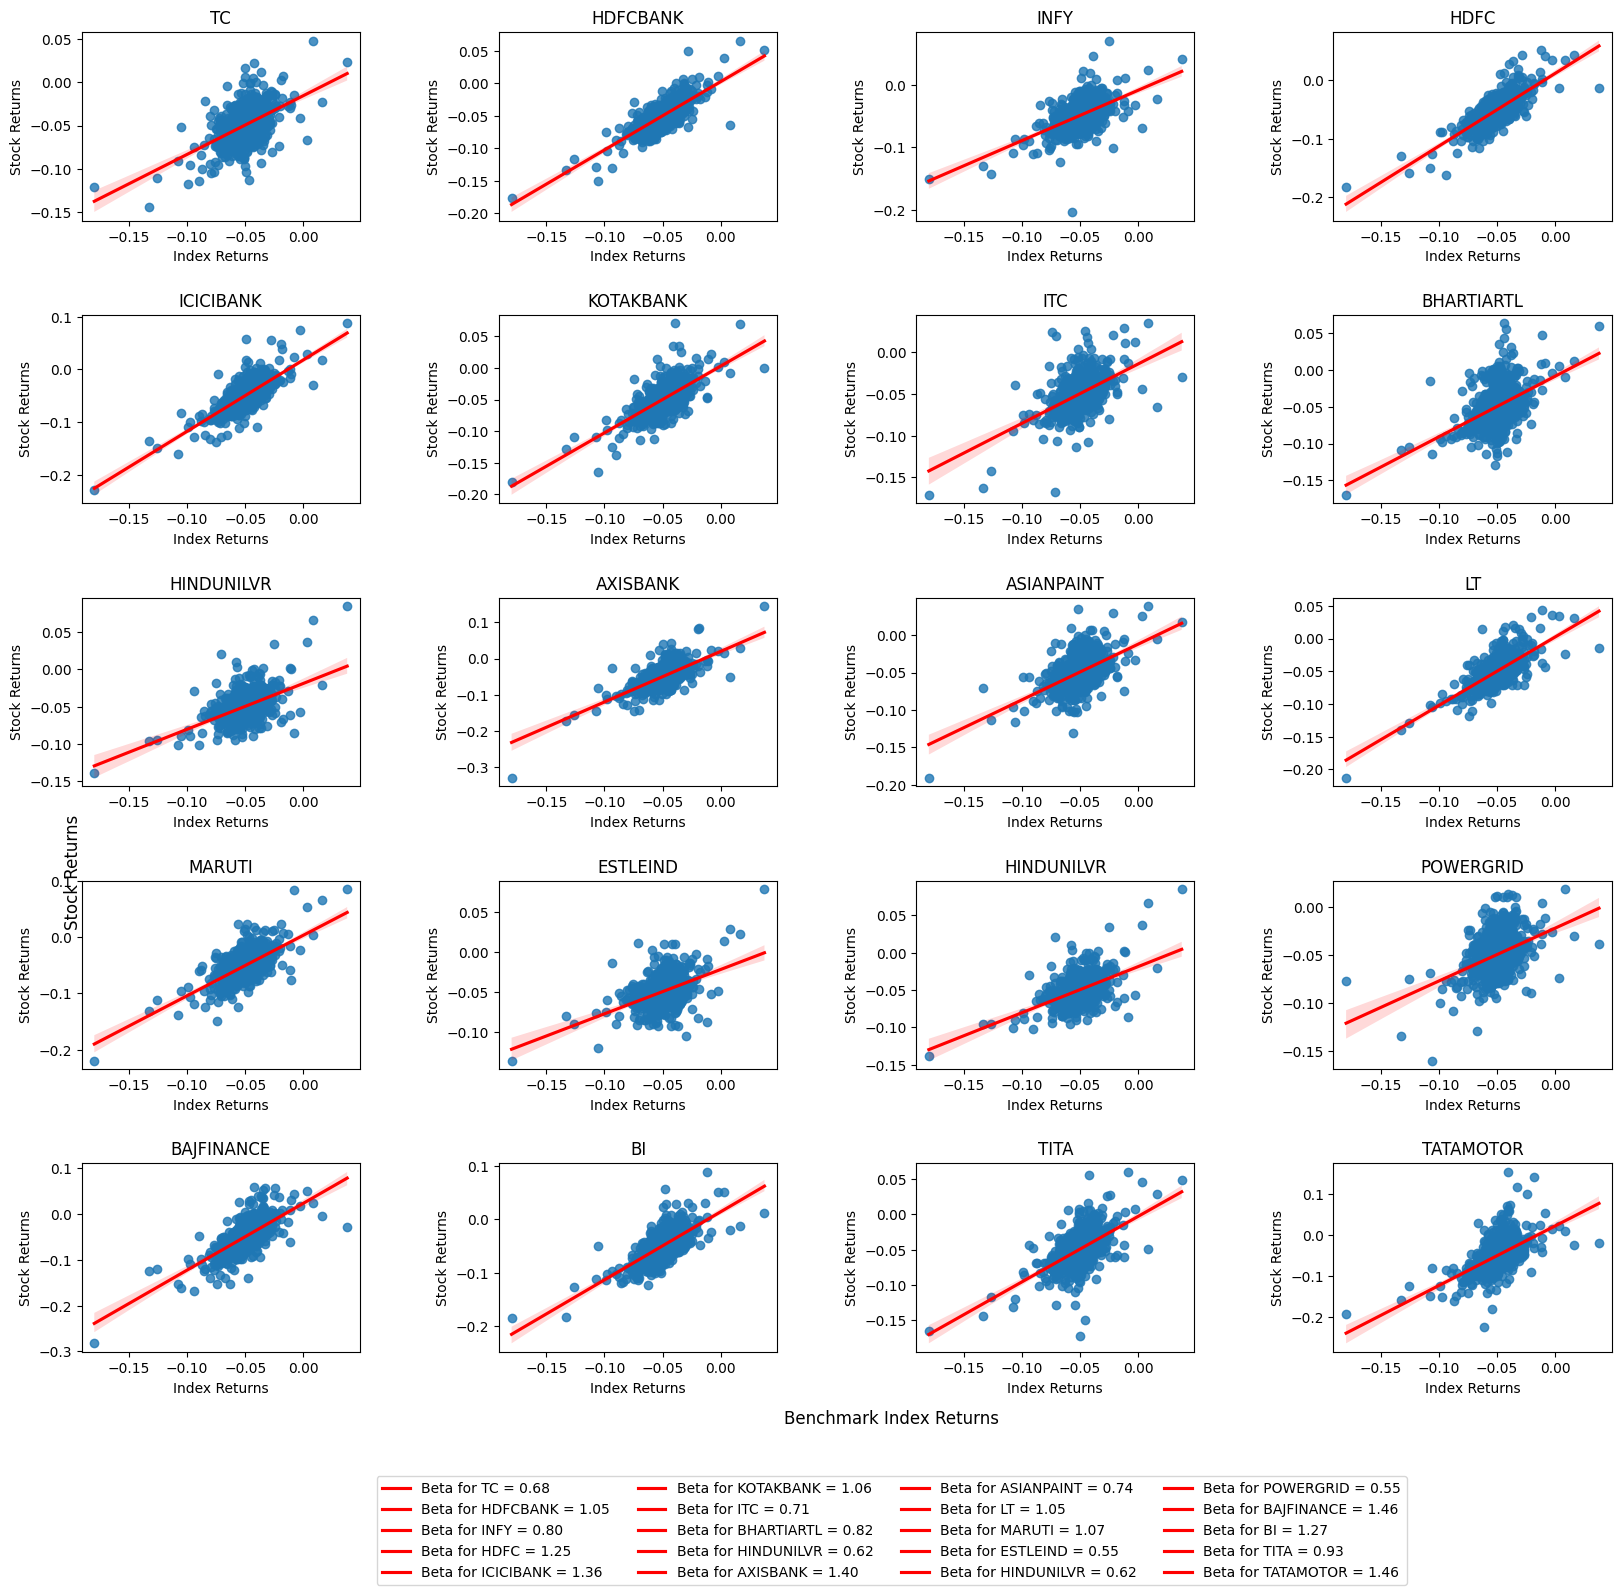

In [14]:
# Set the number of rows and columns for the subplots
num_rows = 5
num_cols = 4

# Create subplots for each stock
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)



# Perform linear regression and plot the regression lines for each stock

for i, stock in enumerate(nifty50_stocks_mod):
    row = i // num_cols
    col = i % num_cols

    stock_daily_returns = combined_returns[stock]
    index_daily_returns = combined_returns["Adj Close"]

    # Create dataframe for regression
    data = pd.DataFrame({'Stock Returns': stock_daily_returns, 'Index Returns': index_daily_returns})
    data = sm.add_constant(data)

    # Perform linear regression
    model = sm.OLS(data['Stock Returns'], data[['const', 'Index Returns']])
    results = model.fit()

    # Extract beta and intercept from regression results
    beta = results.params['Index Returns']
    intercept = results.params['const']

    # Plot the regression line in the corresponding subplot
    sns.regplot(x='Index Returns', y='Stock Returns', data=data, line_kws={'label': f'Beta for {str(stock).strip(".NS")} = {beta:.2f}', 'color': 'red'}, ax=axes[row, col])
    axes[row, col].set_title(str(stock).strip('.NS'))


# Remove empty subplots if the number of stocks is less than the number of subplots
if len(nifty50_stocks_mod) < num_rows * num_cols:
    for i in range(len(nifty50_stocks_mod), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])




# Set plot labels and legend
fig.text(0.5, 0.04, 'Benchmark Index Returns', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Stock Returns', va='center', rotation='vertical', fontsize=12)
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.subplots_adjust(left=0.05,
                    bottom=0.1,
                    right=0.9,
                    top=1.2,
                    wspace=0.5,
                    hspace=0.5)
# Display the plot
plt.show()